# Provocare: Analiza textului despre Știința Datelor

> *În acest notebook, experimentăm cu utilizarea unui URL diferit - articolul Wikipedia despre Învățarea Automată. Puteți observa că, spre deosebire de Știința Datelor, acest articol conține o mulțime de termeni, ceea ce face analiza mai problematică. Trebuie să găsim o altă metodă pentru a curăța datele după extragerea cuvintelor cheie, pentru a elimina unele combinații de cuvinte frecvente, dar lipsite de semnificație.*

În acest exemplu, să facem un exercițiu simplu care acoperă toți pașii unui proces tradițional de știința datelor. Nu trebuie să scrieți niciun cod, puteți doar să faceți clic pe celulele de mai jos pentru a le executa și a observa rezultatul. Ca provocare, sunteți încurajați să încercați acest cod cu date diferite.

## Obiectiv

În această lecție, am discutat diferite concepte legate de Știința Datelor. Să încercăm să descoperim mai multe concepte conexe prin **minarea textului**. Vom începe cu un text despre Știința Datelor, vom extrage cuvinte cheie din acesta și apoi vom încerca să vizualizăm rezultatul.

Ca text, voi folosi pagina despre Știința Datelor de pe Wikipedia:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Pasul 1: Obținerea datelor

Primul pas în orice proces de știința datelor este obținerea datelor. Vom folosi biblioteca `requests` pentru a face acest lucru:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Pasul 2: Transformarea datelor

Următorul pas este să convertim datele într-o formă potrivită pentru procesare. În cazul nostru, am descărcat codul sursă HTML al paginii și trebuie să-l transformăm în text simplu.

Există multe moduri în care acest lucru poate fi realizat. Vom folosi cel mai simplu obiect [HTMLParser](https://docs.python.org/3/library/html.parser.html) integrat în Python. Trebuie să extindem clasa `HTMLParser` și să definim codul care va colecta tot textul din interiorul etichetelor HTML, cu excepția etichetelor `<script>` și `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Pasul 3: Obținerea de informații

Cel mai important pas este să transformăm datele noastre într-o formă din care să putem extrage informații utile. În cazul nostru, dorim să extragem cuvinte cheie din text și să vedem care dintre acestea sunt mai semnificative.

Vom folosi biblioteca Python numită [RAKE](https://github.com/aneesha/RAKE) pentru extragerea cuvintelor cheie. Mai întâi, să instalăm această bibliotecă în cazul în care nu este deja prezentă:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Funcționalitatea principală este disponibilă prin obiectul `Rake`, pe care îl putem personaliza folosind anumiți parametri. În cazul nostru, vom seta lungimea minimă a unui cuvânt cheie la 5 caractere, frecvența minimă a unui cuvânt cheie în document la 3 și numărul maxim de cuvinte dintr-un cuvânt cheie la 2. Simțiți-vă liber să experimentați cu alte valori și să observați rezultatul.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Am obținut o listă de termeni împreună cu gradul lor de importanță asociat. După cum puteți observa, cele mai relevante discipline, precum machine learning și big data, sunt prezente în listă pe pozițiile de top.

## Pasul 4: Vizualizarea Rezultatelor

Oamenii interpretează cel mai bine datele în formă vizuală. Prin urmare, deseori are sens să vizualizăm datele pentru a extrage anumite informații. Putem folosi biblioteca `matplotlib` din Python pentru a crea o distribuție simplă a cuvintelor cheie împreună cu relevanța lor:


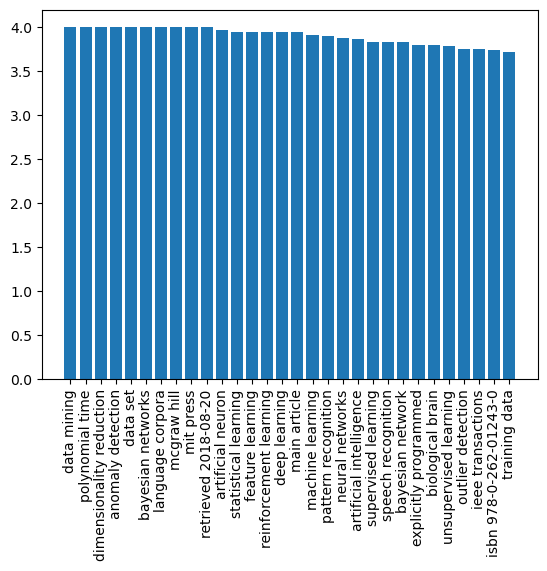

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Există, totuși, o modalitate și mai bună de a vizualiza frecvențele cuvintelor - folosind **Word Cloud**. Va trebui să instalăm o altă bibliotecă pentru a crea un word cloud din lista noastră de cuvinte cheie.


In [71]:
!{sys.executable} -m pip install wordcloud

Obiectul `WordCloud` este responsabil pentru preluarea fie a textului original, fie a unei liste pre-calculate de cuvinte cu frecvențele lor, și returnează o imagine, care poate fi apoi afișată folosind `matplotlib`:


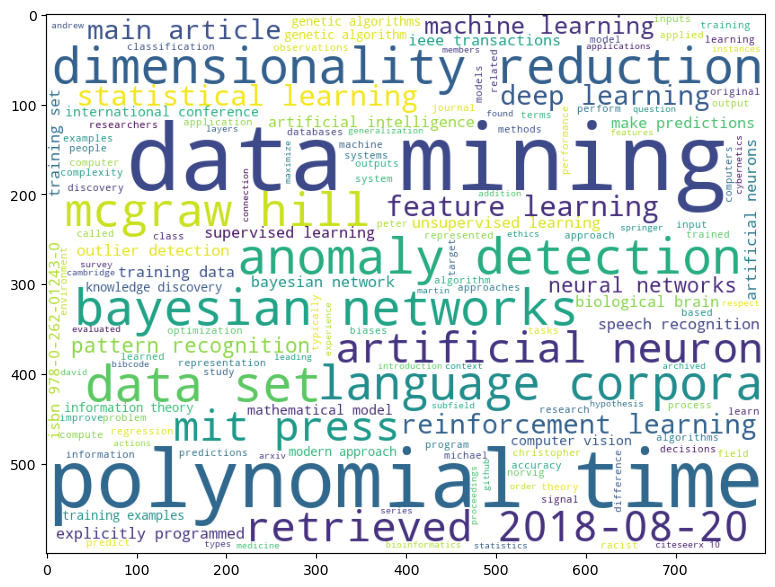

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Putem, de asemenea, să introducem textul original în `WordCloud` - să vedem dacă putem obține un rezultat similar:


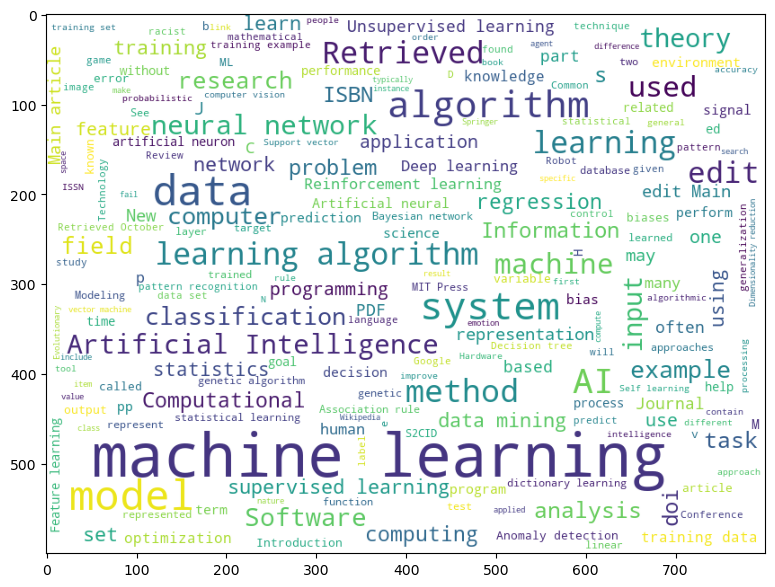

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Poți observa că acum norul de cuvinte arată mai impresionant, dar conține și mult zgomot (de exemplu, cuvinte nerelevante precum `Retrieved on`). De asemenea, obținem mai puține cuvinte-cheie formate din două cuvinte, cum ar fi *data scientist* sau *computer science*. Acest lucru se întâmplă deoarece algoritmul RAKE face o treabă mult mai bună în selectarea cuvintelor-cheie relevante din text. Acest exemplu ilustrează importanța pre-procesării și curățării datelor, deoarece o imagine clară la final ne va permite să luăm decizii mai bune.

În acest exercițiu am parcurs un proces simplu de extragere a unor informații dintr-un text de pe Wikipedia, sub forma cuvintelor-cheie și a unui nor de cuvinte. Acest exemplu este destul de simplu, dar demonstrează bine toți pașii tipici pe care un data scientist îi urmează atunci când lucrează cu date, începând de la achiziția datelor până la vizualizare.

În cadrul cursului nostru vom discuta în detaliu toți acești pași.



---

**Declinarea responsabilității**:  
Acest document a fost tradus folosind serviciul de traducere AI [Co-op Translator](https://github.com/Azure/co-op-translator). Deși depunem eforturi pentru a asigura acuratețea, vă rugăm să aveți în vedere că traducerile automate pot conține erori sau inexactități. Documentul original în limba sa nativă ar trebui considerat sursa autoritară. Pentru informații critice, se recomandă traducerea profesională realizată de un specialist uman. Nu ne asumăm răspunderea pentru eventualele neînțelegeri sau interpretări greșite care pot apărea din utilizarea acestei traduceri.
